# Part 2: Data Visualization

---

# To TAs/Graders:

Some of these plots and graphs following are used in presentation and poster.

The dataset used in this notebook is `data/data_com.csv`, which is the cleaned dataset we have already created.

----

In [1]:
# Load the packages needed for this part
# create spark and sparkcontext objects
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

import pyspark
from pyspark.ml import feature, regression, Pipeline
from pyspark.sql import functions as fn, Row
from pyspark import sql

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

##### Use `data/data_com.csv` , which is the cleaned dataset we have already created.

In [2]:
data_path = 'data/data_com.csv'
data = pd.read_csv(data_path, dtype = {'LEAID':str,'SCHLEV':str,'AGCHRT':str})
data = data[['LEAID', 'SCHLEV', 'AGCHRT', 'CONUM', 'FIPST', 'YEAR',
       'V33', 'Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
       'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other',
       'Ex_Teacher_Inst', 'Ex_Teacher_Supp', 'Ex_Employ', 'Ex_Edu',
       'Ex_Community', 'Ex_Capital', 'Ex_Payment', 'Ex_Textbook',
       'Ex_Interest', 'AFGR']]
data_per = data.copy()

In [3]:
# Load the data

data_per['Re_Sum'] = data_per[['Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
                       'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other']].sum(axis=1)
data_per['Ex_Sum'] = data_per[['Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
                       'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other']].sum(axis=1)
for a in ['Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
          'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other']:
    data_per[a+'_Per'] = data_per[a]/data_per['Re_Sum']
for b in ['Ex_Teacher_Inst', 'Ex_Teacher_Supp', 'Ex_Employ', 'Ex_Edu',
          'Ex_Community', 'Ex_Capital', 'Ex_Payment', 'Ex_Textbook','Ex_Interest']:
    data_per[b+'_Per'] = data_per[b]/data_per['Ex_Sum']
    
data_per = data_per[['LEAID', 'SCHLEV', 'AGCHRT', 'CONUM', 'FIPST', 'YEAR',
       'V33', 'Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per',
       'Re_S_Special_Per', 'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 'Re_L_Other_Per',
       'Ex_Teacher_Inst_Per', 'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per',
       'Ex_Community_Per', 'Ex_Capital_Per', 'Ex_Payment_Per', 'Ex_Textbook_Per',
       'Ex_Interest_Per', 'AFGR']]


In [4]:
edu_df = data_per.copy()

In [5]:
edu_df.describe()

,CONUM,FIPST,YEAR,V33,Re_F_Basic_Per,Re_F_Special_Per,Re_F_Other_Per,Re_S_Basic_Per,Re_S_Special_Per,Re_S_Other_Per,...,Ex_Teacher_Inst_Per,Ex_Teacher_Supp_Per,Ex_Employ_Per,Ex_Edu_Per,Ex_Community_Per,Ex_Capital_Per,Ex_Payment_Per,Ex_Textbook_Per,Ex_Interest_Per,AFGR
count,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,...,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000,38010.000000
mean,31496.546198,31.402368,8.493054,3742.582110,0.043142,0.019034,0.028986,0.414167,0.029668,0.052535,...,0.349434,0.157826,0.170206,0.856647,0.007534,0.097306,0.024701,0.003876,0.023562,82.220076
std,14227.520121,14.214081,1.124410,12577.840701,0.031006,0.034930,0.036051,0.163734,0.036455,0.066908,...,0.053486,0.031155,0.054623,0.097357,0.020893,0.154816,0.047372,0.003839,0.025227,13.395064
min,1001.000000,1.000000,7.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.106383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20045.000000,20.000000,7.000000,577.000000,0.020489,0.000158,0.005706,0.311707,0.000741,0.008636,...,0.321496,0.137430,0.137184,0.810784,0.000000,0.021907,0.000828,0.000000,0.004848,74.200000
50%,34003.000000,34.000000,8.000000,1353.000000,0.036011,0.014397,0.015802,0.433070,0.016325,0.027159,...,0.352972,0.158313,0.168306,0.865088,0.001658,0.046234,0.008919,0.003254,0.017040,83.800000
75%,42017.000000,42.000000,10.000000,3180.000000,0.059104,0.023715,0.041434,0.530002,0.048463,0.072730,...,0.382575,0.178338,0.202039,0.914234,0.008267,0.101091,0.030693,0.005919,0.033933,92.400000
max,56045.000000,56.000000,10.000000,707627.000000,0.335299,0.632305,0.850348,0.993683,0.576504,0.784820,...,0.675551,0.401697,1.363994,2.423389,0.956981,2.867122,0.812667,0.043860,0.868758,100.000000


# Correlation matrix plot

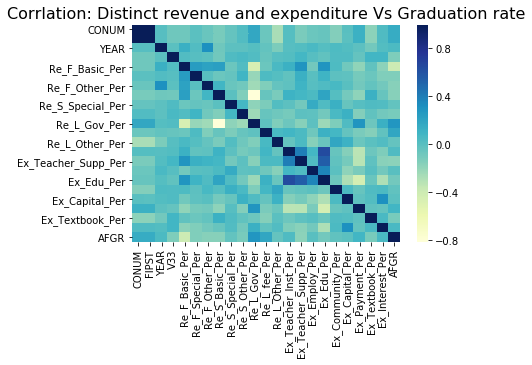

In [6]:
corr = edu_df.corr()
corrplot = sns.heatmap(corr,cmap="YlGnBu")
corrplot.axes.set_title("Corrlation: Distinct revenue and expenditure Vs Graduation rate",fontsize=16)
plt.show()

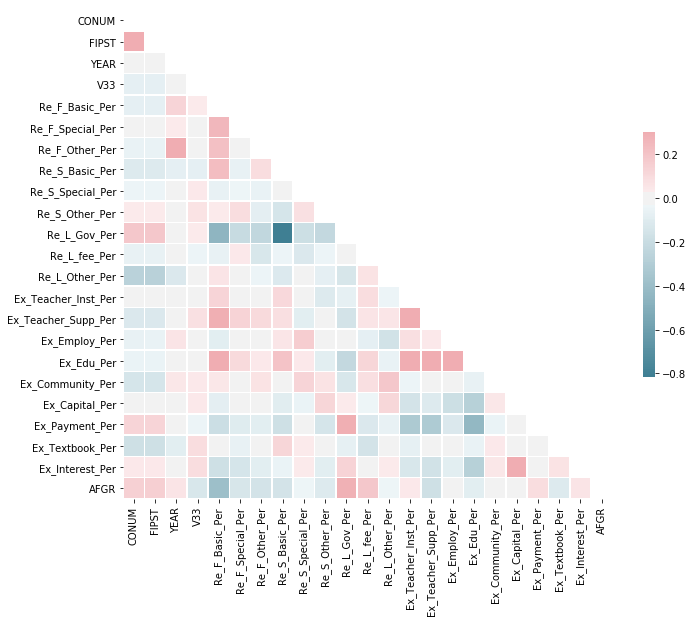

In [7]:
corr = edu_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [8]:
df=edu_df.copy()

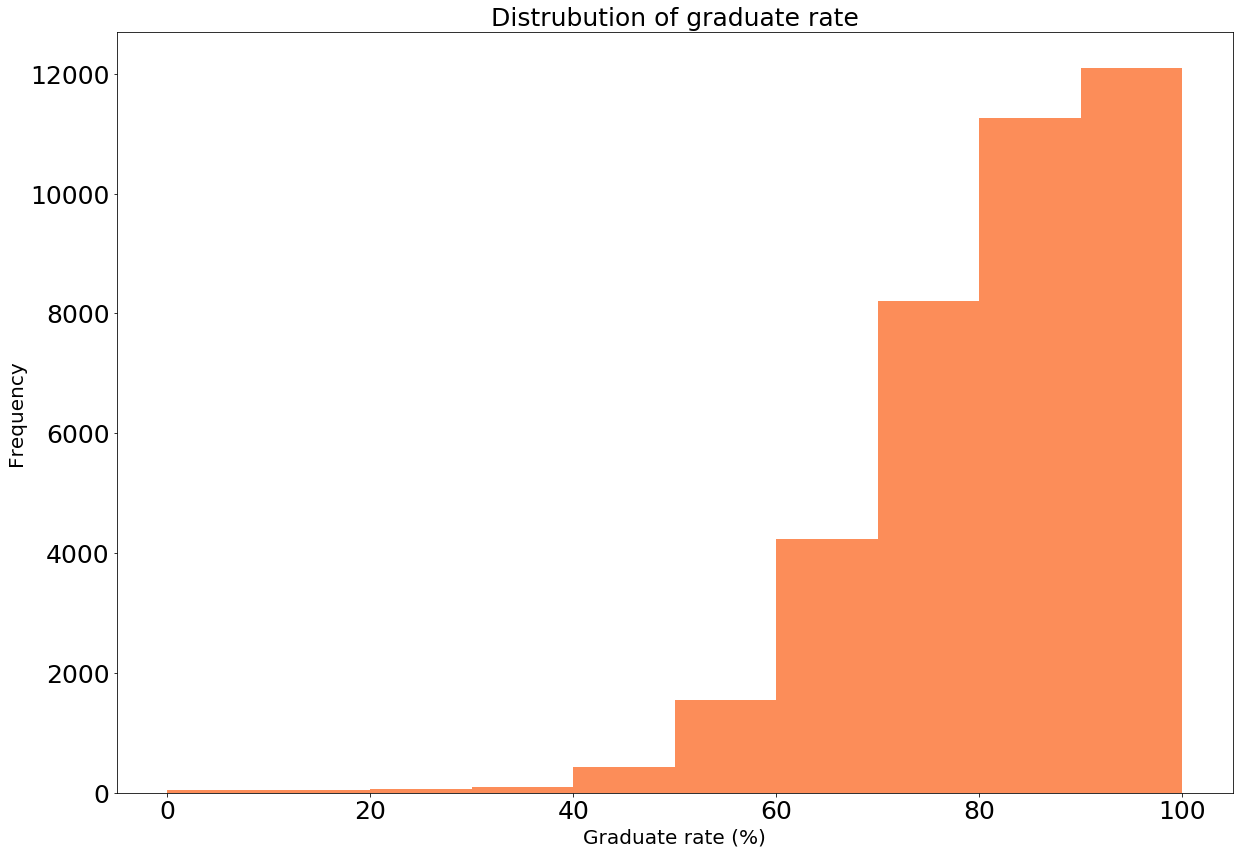

In [9]:
df['AFGR'].plot(kind='hist',color='#fc8d59',figsize=(20,14),fontsize=25)
plt.title('Distrubution of graduate rate',fontsize=25)
plt.xlabel('Graduate rate (%)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.show()

# Split the dataset by high and low graduate rate based on medium

In [10]:
High = df[df['AFGR'] >= 83.8]
Low = df[df['AFGR'] < 83.8]

# Calculate the mean of all the attributes 

In [11]:
High = df[df['AFGR'] >= 83.8]
Low = df[df['AFGR'] < 83.8]

cond = ['Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per',\
       'Re_S_Special_Per', 'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 'Re_L_Other_Per',\
       'Ex_Teacher_Inst_Per', 'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per',\
       'Ex_Community_Per', 'Ex_Capital_Per', 'Ex_Payment_Per', 'Ex_Textbook_Per',\
       'Ex_Interest_Per']


h = [np.mean(High[c]) for c in cond]
l = [np.mean(Low[c]) for c in cond]

hl = pd.DataFrame(data={'Attribute': cond, 'High_AFGR': h, 'Low_AFGR': l})
hl = hl.set_index('Attribute')

hl

,High_AFGR,Low_AFGR
Attribute,,
Re_F_Basic_Per,0.032600,0.053732
Re_F_Special_Per,0.015706,0.022377
Re_F_Other_Per,0.024207,0.033786
Re_S_Basic_Per,0.387263,0.441192
Re_S_Special_Per,0.029034,0.030306
Re_S_Other_Per,0.045691,0.059410
Re_L_Gov_Per,0.396485,0.292059
Re_L_fee_Per,0.033437,0.027271
Re_L_Other_Per,0.035576,0.039868


In [12]:
Re = hl.filter(like='Re_', axis=0)

In [13]:
Ex = hl.filter(like='Ex_', axis=0)

# School district average revenue sources by average graduate rate

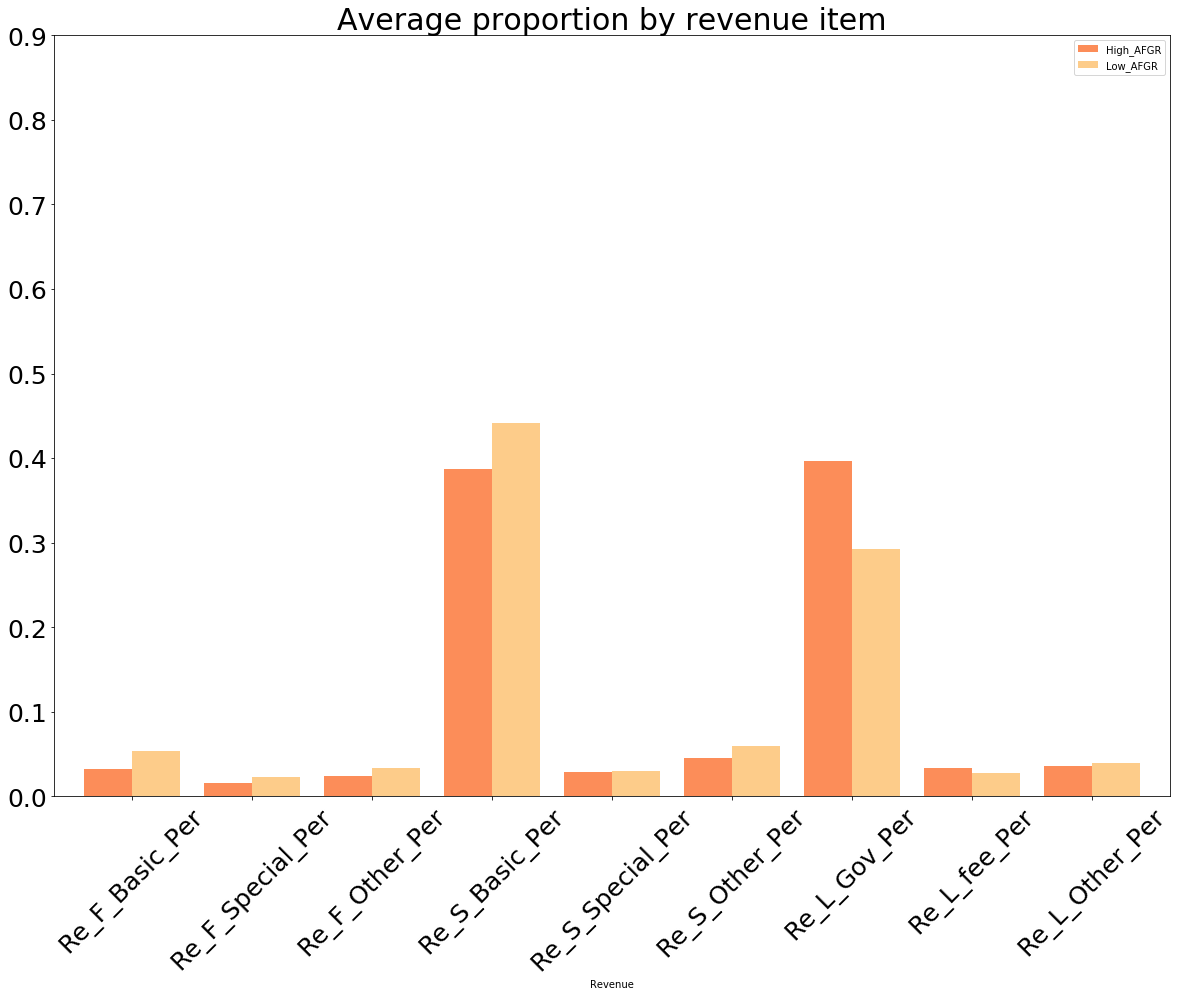

In [14]:
Re[["High_AFGR", "Low_AFGR"]].plot(kind='bar',color=['#fc8d59','#fdcc8a'],rot=45,width=0.8,figsize=(20,14),fontsize=25)
plt.title('Average proportion by revenue item',fontsize=30)
plt.ylim([0, 0.9])
plt.xlabel('Revenue')
plt.show()

# School district average expenditure sources by average graduate rate

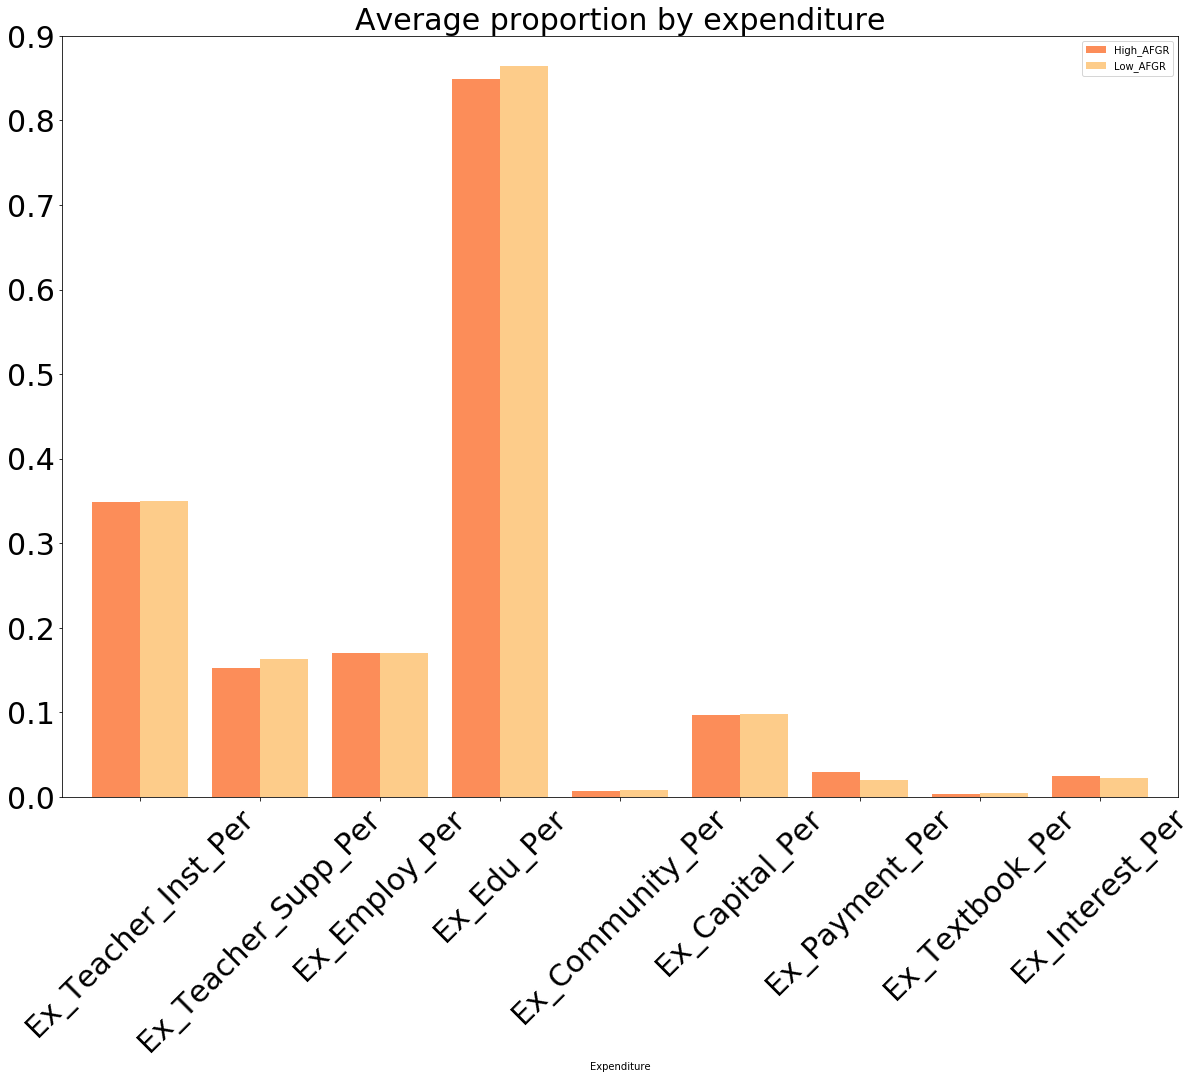

In [15]:
Ex[["High_AFGR", "Low_AFGR"]].plot(kind='bar',color=['#fc8d59','#fdcc8a'],rot=45,width=0.8,figsize=(20, 14),fontsize=30)
plt.title('Average proportion by expenditure',fontsize=30)
plt.ylim([0, 0.9])
plt.xlabel('Expenditure')
plt.show()

# Percentage difference in means of High vs Low AFGR

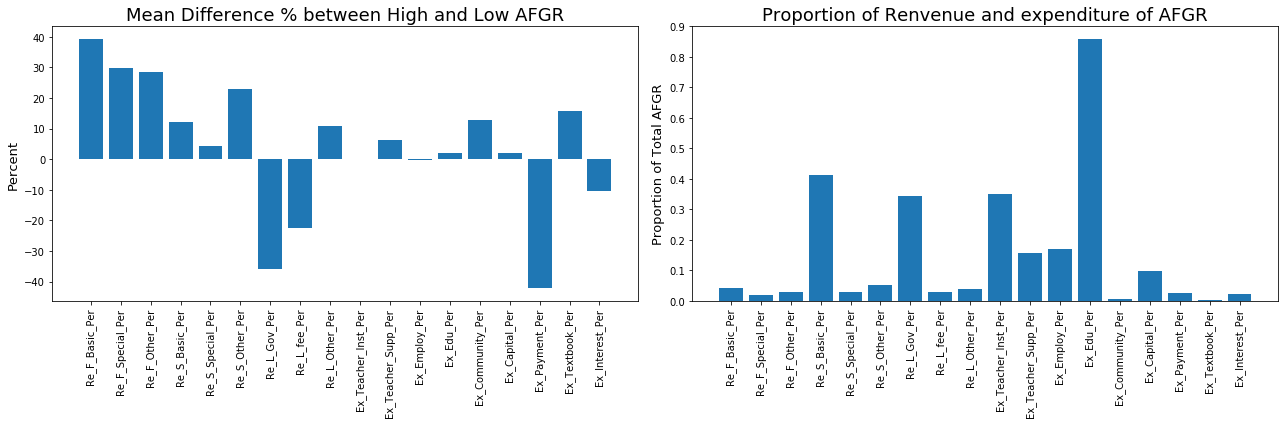

In [16]:
l = np.array(l)
h = np.array(h)

p_diff = (l-h)/l*100

fig, axes = plt.subplots(1,2,figsize=(18,6))


axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between High and Low AFGR', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)


tf_col = ['Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per',\
       'Re_S_Special_Per', 'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 'Re_L_Other_Per',\
       'Ex_Teacher_Inst_Per', 'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per',\
       'Ex_Community_Per', 'Ex_Capital_Per', 'Ex_Payment_Per', 'Ex_Textbook_Per',\
       'Ex_Interest_Per']

tf_sum = [df[col].sum()/37994 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total AFGR', fontsize=13)
axes[1].set_title('Proportion of Renvenue and expenditure of AFGR', fontsize=18)

plt.tight_layout()

plt.show()

# Revenue and expenditure difference in high and low AFGR

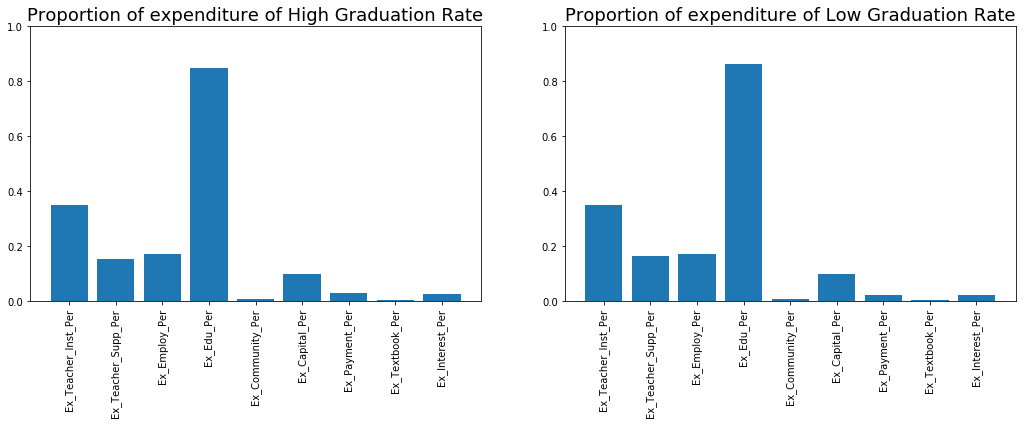

In [17]:
fig, axes = plt.subplots(1,2,figsize=(15,6))

Ex_col = ['Ex_Teacher_Inst_Per', 'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per',\
       'Ex_Community_Per', 'Ex_Capital_Per', 'Ex_Payment_Per', 'Ex_Textbook_Per',\
       'Ex_Interest_Per']
ExHigh_sum = [High[col].mean() for col in Ex_col]

axes[0].bar(Ex_col, ExHigh_sum)
axes[0].set_xticks(Ex_col)
axes[0].set_xticklabels(Ex_col, rotation=90)
axes[0].set_title('Proportion of expenditure of High Graduation Rate', fontsize=18)
axes[0].set_ylim([0, 1])


ExLow_sum = [Low[col].mean() for col in Ex_col]

axes[1].bar(Ex_col, ExLow_sum)
axes[1].set_xticks(Ex_col)
axes[1].set_xticklabels(Ex_col, rotation=90)
axes[1].set_title('Proportion of expenditure of Low Graduation Rate', fontsize=18)
axes[1].set_ylim([0, 1])

plt.tight_layout()

plt.show()

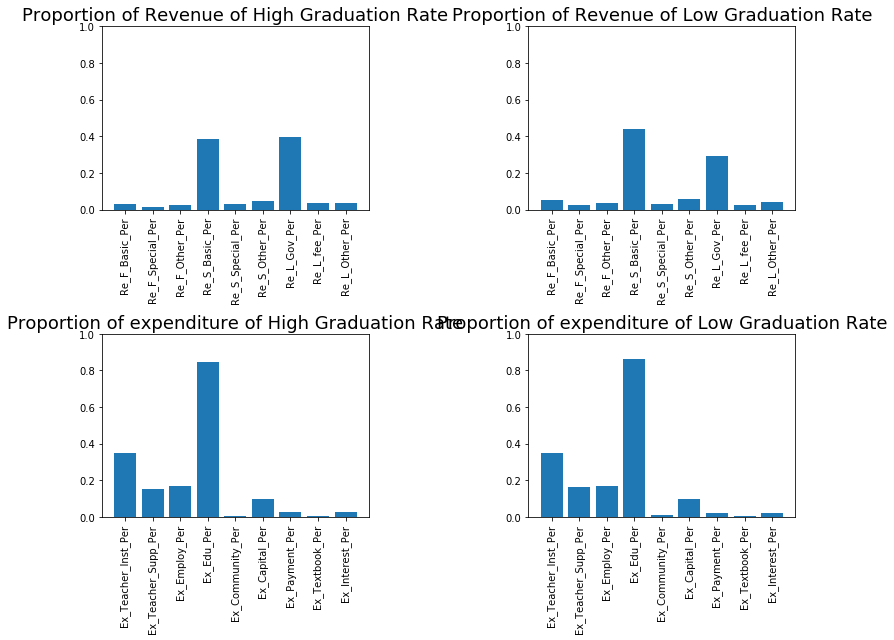

In [18]:
fig, axes = plt.subplots(2,2,figsize=(12,9))

Re_col = ['Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per',\
       'Re_S_Special_Per', 'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 'Re_L_Other_Per']
ReHigh_sum = [High[col].mean() for col in Re_col]

axes[0,0].bar(Re_col, ReHigh_sum)
axes[0,0].set_xticks(Re_col)
axes[0,0].set_xticklabels(Re_col, rotation=90)
axes[0,0].set_title('Proportion of Revenue of High Graduation Rate', fontsize=18)
axes[0,0].set_ylim([0, 1])


ReLow_sum = [Low[col].mean() for col in Re_col]

axes[0,1].bar(Re_col, ReLow_sum)
axes[0,1].set_xticks(Re_col)
axes[0,1].set_xticklabels(Re_col, rotation=90)
axes[0,1].set_title('Proportion of Revenue of Low Graduation Rate', fontsize=18)
axes[0,1].set_ylim([0, 1])


Ex_col = ['Ex_Teacher_Inst_Per', 'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per',\
       'Ex_Community_Per', 'Ex_Capital_Per', 'Ex_Payment_Per', 'Ex_Textbook_Per',\
       'Ex_Interest_Per']
ExHigh_sum = [High[col].mean() for col in Ex_col]

axes[1,0].bar(Ex_col, ExHigh_sum)
axes[1,0].set_xticks(Ex_col)
axes[1,0].set_xticklabels(Ex_col, rotation=90)
axes[1,0].set_title('Proportion of expenditure of High Graduation Rate', fontsize=18)
axes[1,0].set_ylim([0, 1])


ExLow_sum = [Low[col].mean() for col in Ex_col]

axes[1,1].bar(Ex_col, ExLow_sum)
axes[1,1].set_xticks(Ex_col)
axes[1,1].set_xticklabels(Ex_col, rotation=90)
axes[1,1].set_title('Proportion of expenditure of Low Graduation Rate', fontsize=18)
axes[1,1].set_ylim([0, 1])

plt.tight_layout()

plt.show()